## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
csvpath = Path('bitstamp.csv')

In [3]:
csvpath

PosixPath('bitstamp.csv')

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [4]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(csvpath,index_col = "Timestamp", parse_dates=True, infer_datetime_format=True)
#df_bitstamp.head()

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [6]:
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [7]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
csvpath_1 = Path('coinbase.csv')
coinbase = pd.read_csv(csvpath_1 ,index_col = "Timestamp", parse_dates=True, infer_datetime_format=True)

In [8]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [9]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [10]:
bitstamp = bitstamp.dropna()

In [11]:
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [12]:
# Use the str.replace function to remove the dollar sign, $
# bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$","")

In [13]:
bitstamp['Close'] = bitstamp['Close'].str.replace("$","")

/Users/oliviathomas/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [14]:
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [15]:
# Convert the Close data type to a float
bitstamp["Close"] = bitstamp["Close"].astype(float)

In [16]:
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129067 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129067 non-null  float64
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [17]:
# Review the data for duplicate values, and drop them if necessary
bitstamp = bitstamp.drop_duplicates()

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [18]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [19]:
coinbase = coinbase.dropna()

In [20]:
coinbase['Close'] = coinbase['Close'].str.replace("$","")

/Users/oliviathomas/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [21]:
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [22]:
coinbase["Close"] = coinbase["Close"].astype(float)

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [23]:
# data.iloc[:'2018-01-10',0]

In [24]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,['Close']]
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [25]:
bitstamp_sliced = bitstamp.iloc[:,[3]]

In [26]:
# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [27]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,['Close']]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [28]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

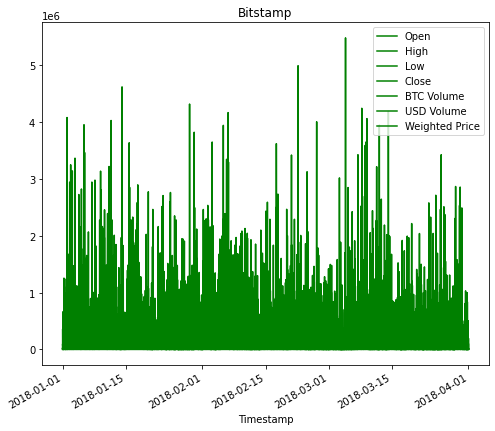

In [33]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp.plot(figsize=(7, 8), title="Bitstamp", color="green")

In [30]:
coinbase.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

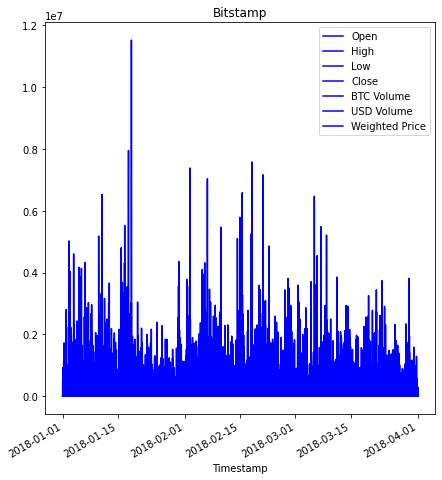

In [34]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase.plot(figsize=(7, 8), title="Bitstamp", color="blue")

<AxesSubplot:title={'center':'Bitstamp v. coinbase'}, xlabel='Timestamp'>

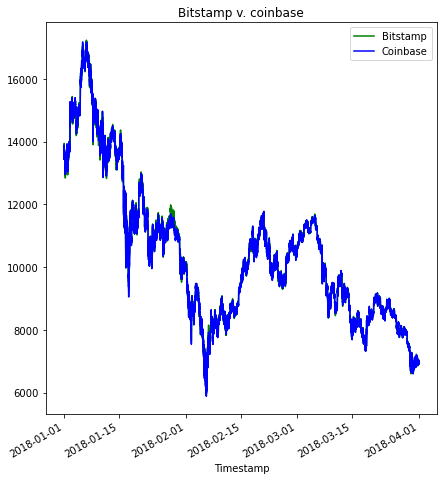

In [36]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].plot(legend=True, figsize=(7, 8), title="Bitstamp v. coinbase", color="green", label="Bitstamp")
coinbase['Close'].plot(legend=True, figsize=(7, 8), color="blue", label="Coinbase")

<AxesSubplot:title={'center':'January 2018'}, xlabel='Timestamp'>

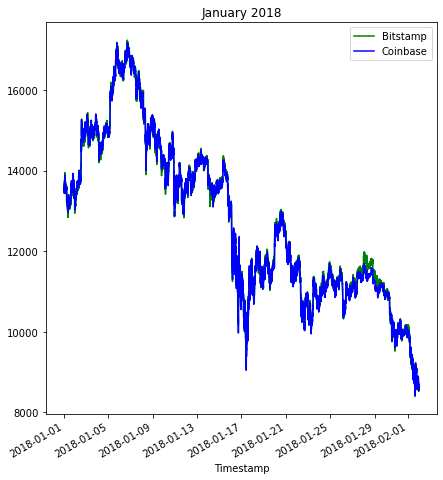

In [40]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp['Close'].loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(7, 8), title="January 2018", color="green", label="Bitstamp")
coinbase['Close'].loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(7, 8), color="blue", label="Coinbase")

<AxesSubplot:title={'center':'January 2018'}, xlabel='Timestamp'>

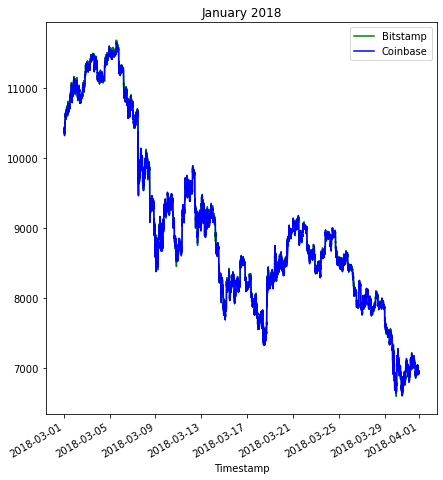

In [38]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(7, 8), title="January 2018", color="green", label="Bitstamp")
coinbase['Close'].loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(7, 8), color="blue", label="Coinbase")


**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, it appears as if the trendline isn't as steep as data progresses.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 1,2018'}, xlabel='Timestamp'>

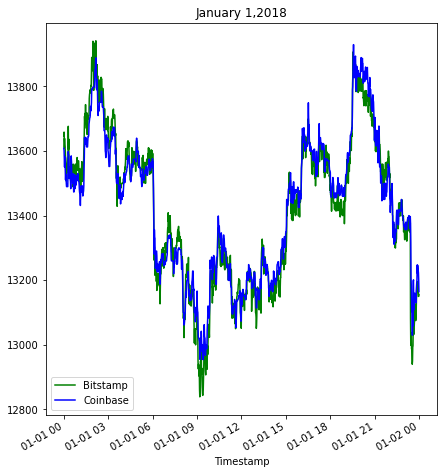

In [67]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-01-01'].plot(
    legend=True, figsize=(7, 8), title="January 1,2018", color="green", label="Bitstamp")
coinbase['Close'].loc['2018-01-01'].plot(
    legend=True, figsize=(7, 8), color="blue", label="Coinbase")

In [74]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-01'] - coinbase['Close'].loc['2018-01-01']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1421.000000
mean       -5.767368
std        46.214511
min      -319.990000
25%       -36.000000
50%        -5.480000
75%        26.890000
max       142.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread 01/01/2018'}, xlabel='Timestamp'>

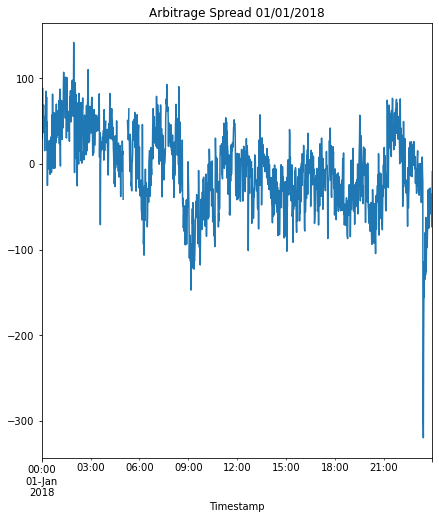

In [75]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(figsize=(7, 8), title="Arbitrage Spread 01/01/2018")

<AxesSubplot:title={'center':'February 15,2018'}, xlabel='Timestamp'>

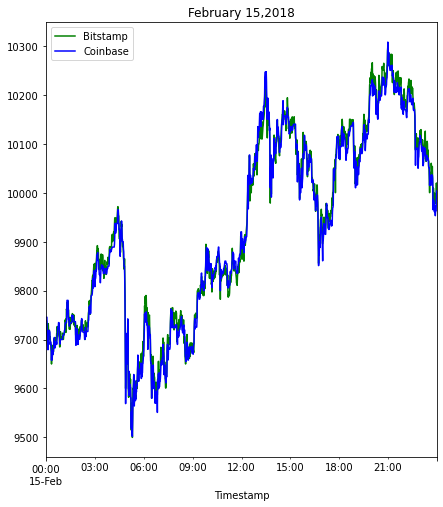

In [65]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-02-15'].plot(
    legend=True, figsize=(7, 8), title="February 15,2018", color="green", label="Bitstamp")
coinbase['Close'].loc['2018-02-15'].plot(
    legend=True, figsize=(7, 8), color="blue", label="Coinbase")

In [72]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-15'] - coinbase['Close'].loc['2018-02-15']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean        5.760007
std        14.908671
min       -48.800000
25%        -3.995000
50%         6.960000
75%        16.217500
max        55.470000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread 02/15/2018'}, xlabel='Timestamp'>

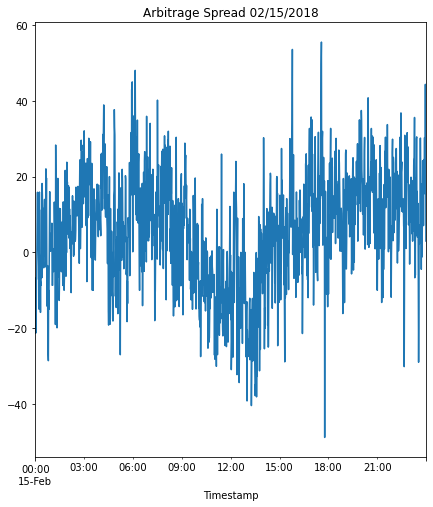

In [73]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(figsize=(7, 8), title="Arbitrage Spread 02/15/2018")

<AxesSubplot:title={'center':'March 29,2018'}, xlabel='Timestamp'>

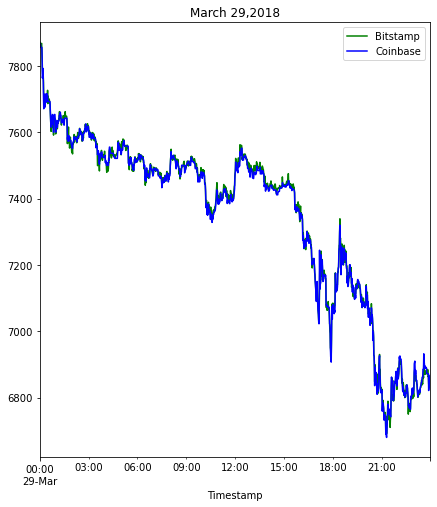

In [63]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-29'].plot(
    legend=True, figsize=(7, 8), title="March 29,2018", color="green", label="Bitstamp")
coinbase['Close'].loc['2018-03-29'].plot(
    legend=True, figsize=(7, 8), color="blue", label="Coinbase")

In [70]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-29'] - coinbase['Close'].loc['2018-03-29']



# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean        2.787611
std        10.030143
min       -89.900000
25%        -2.942500
50%         3.645000
75%         9.132500
max        45.600000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread 03/29/2018'}, xlabel='Timestamp'>

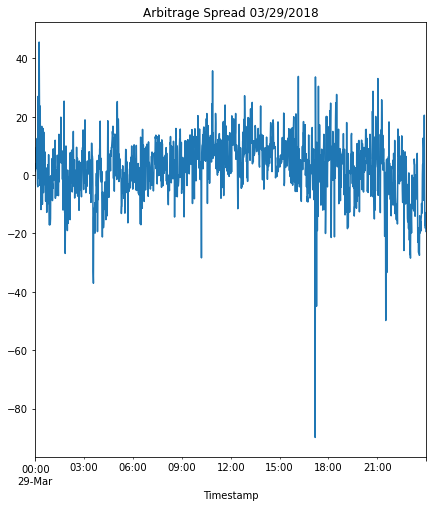

In [71]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(figsize=(7, 8), title="Arbitrage Spread 03/29/2018")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [84]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-01'] - coinbase['Close'].loc['2018-01-01']
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early_stats = arbitrage_spread_early[arbitrage_spread_early > 0]
arbitrage_spread_early_stats.describe()

count    636.000000
mean      34.664418
std       24.260997
min        0.010000
25%       14.587500
50%       30.605000
75%       51.685000
max      142.000000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [85]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp['Close'].loc['2018-01-01']


# Review the spread return DataFrame
spread_return_early.describe()

count    6.360000e+02
mean     2.558255e-03
std      1.775346e-03
min      7.326007e-07
25%      1.074173e-03
50%      2.289578e-03
75%      3.785827e-03
max      1.018651e-02
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [86]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = arbitrage_spread_early[arbitrage_spread_early>0.1] / bitstamp['Close'].loc['2018-01-01']



# Review the first five profitable trades
profitable_trades_early.describe()

count    634.000000
mean       0.002566
std        0.001772
min        0.000007
25%        0.001079
50%        0.002292
75%        0.003790
max        0.010187
Name: Close, dtype: float64

In [87]:
profitable_trades_middle = arbitrage_spread_middle[arbitrage_spread_middle>0.1] / bitstamp['Close'].loc['2018-02-15']
profitable_trades_middle.describe()

count    962.000000
mean       0.001415
std        0.000932
min        0.000017
25%        0.000687
50%        0.001293
75%        0.001964
max        0.005553
Name: Close, dtype: float64

In [92]:
profitable_trades_late = arbitrage_spread_late[arbitrage_spread_late>0.1] / bitstamp['Close'].loc['2018-03-29']
profitable_trades_late.describe()

count    929.000000
mean       0.001140
std        0.000807
min        0.000016
25%        0.000538
50%        0.001019
75%        0.001543
max        0.005884
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [89]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()
#Answer: There is a higher return probability within the earlier date than the later dates.

count    634.000000
mean       0.002566
std        0.001772
min        0.000007
25%        0.001079
50%        0.002292
75%        0.003790
max        0.010187
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [90]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = arbitrage_spread_early[arbitrage_spread_early>0.1] * bitstamp['Close'].loc['2018-01-01']



# Drop any missing values from the profit DataFrame
profit_early = profit_early.dropna()

# View the early profit DataFrame
profit_early.describe()

count    6.340000e+02
mean     4.712800e+05
std      3.312346e+05
min      1.360010e+03
25%      1.982780e+05
50%      4.180939e+05
75%      7.015714e+05
max      1.979480e+06
Name: Close, dtype: float64

In [94]:
profit_middle = arbitrage_spread_middle[arbitrage_spread_middle>0.1] * bitstamp['Close'].loc['2018-02-15']
profit_middle = profit_middle.dropna()
profit_middle.describe()


count       962.000000
mean     140203.958450
std       92733.796442
min        1546.486400
25%       68907.266100
50%      126962.275800
75%      197203.621350
max      554116.455600
Name: Close, dtype: float64

In [95]:
profit_late = arbitrage_spread_late[arbitrage_spread_late>0.1] * bitstamp['Close'].loc['2018-03-29']
profit_late = profit_late.dropna()
profit_late.describe()



count       929.000000
mean      61885.662815
std       43752.608520
min         900.000000
25%       29426.520000
50%       54161.910500
75%       83850.287600
max      353405.016000
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [96]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_early.describe()

count    6.340000e+02
mean     4.712800e+05
std      3.312346e+05
min      1.360010e+03
25%      1.982780e+05
50%      4.180939e+05
75%      7.015714e+05
max      1.979480e+06
Name: Close, dtype: float64

<AxesSubplot:title={'center':'01/01/2018 Profit'}, xlabel='Timestamp'>

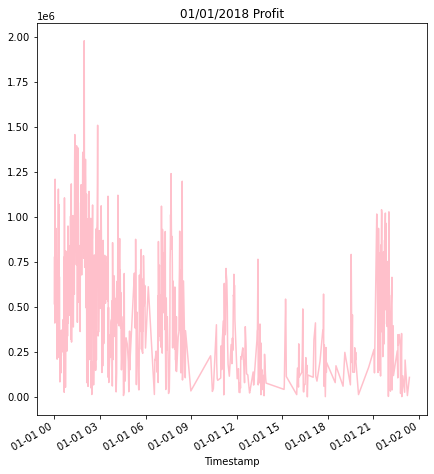

In [102]:
# Plot the results for the early profit per trade DataFrame
profit_early.plot(figsize=(7, 8), title="01/01/2018 Profit", color="pink")

<AxesSubplot:title={'center':'02/15/2018 Profit'}, xlabel='Timestamp'>

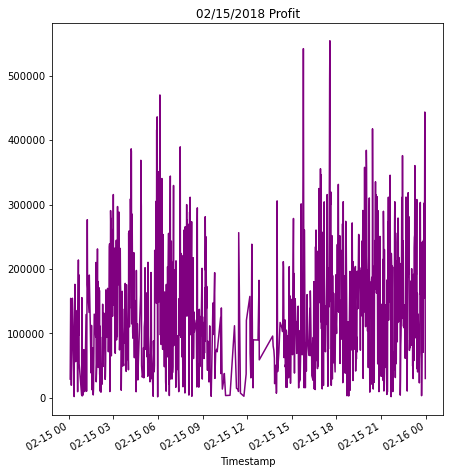

In [104]:
profit_middle.plot(figsize=(7, 8), title="02/15/2018 Profit", color="purple")

<AxesSubplot:title={'center':'03/029/2018 Profit'}, xlabel='Timestamp'>

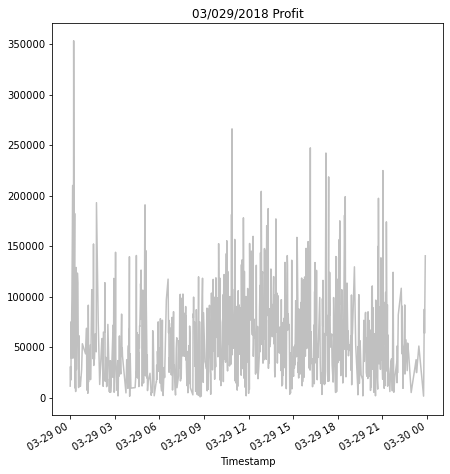

In [105]:
profit_late.plot(figsize=(7, 8), title="03/029/2018 Profit", color="silver")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [115]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_early.sum()

298791500.0678

In [116]:
profit_late.sum()

57491780.75489989

In [117]:
profit_middle.sum()

134876208.02879986

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [121]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_early.cumsum()
print(cumulative_profit_early)

Timestamp
2018-01-01 00:00:00    5.184298e+05
2018-01-01 00:01:00    1.298208e+06
2018-01-01 00:02:00    1.709509e+06
2018-01-01 00:03:00    2.919978e+06
2018-01-01 00:04:00    3.417925e+06
                           ...     
2018-01-01 23:03:00    2.983323e+08
2018-01-01 23:04:00    2.984678e+08
2018-01-01 23:05:00    2.986737e+08
2018-01-01 23:14:00    2.986820e+08
2018-01-01 23:22:00    2.987915e+08
Name: Close, Length: 634, dtype: float64


In [122]:
cumulative_profit_middle = profit_middle.cumsum()
print(cumulative_profit_middle)

Timestamp
2018-02-15 00:06:00    2.906400e+04
2018-02-15 00:07:00    1.310966e+05
2018-02-15 00:08:00    2.854549e+05
2018-02-15 00:09:00    3.664168e+05
2018-02-15 00:10:00    3.859480e+05
                           ...     
2018-02-15 23:55:00    1.338484e+08
2018-02-15 23:56:00    1.341185e+08
2018-02-15 23:57:00    1.345620e+08
2018-02-15 23:58:00    1.348462e+08
2018-02-15 23:59:00    1.348762e+08
Name: Close, Length: 962, dtype: float64


In [123]:
cumulative_profit_late = profit_late.cumsum()
print(cumulative_profit_late)

Timestamp
2018-03-29 00:00:00    1.149232e+04
2018-03-29 00:01:00    4.233880e+04
2018-03-29 00:02:00    5.980407e+04
2018-03-29 00:03:00    7.742669e+04
2018-03-29 00:04:00    1.526908e+05
                           ...     
2018-03-29 23:46:00    5.717430e+07
2018-03-29 23:47:00    5.719974e+07
2018-03-29 23:49:00    5.728739e+07
2018-03-29 23:50:00    5.735125e+07
2018-03-29 23:53:00    5.749178e+07
Name: Close, Length: 929, dtype: float64


<AxesSubplot:title={'center':'01/01/2018 Profit'}, xlabel='Timestamp'>

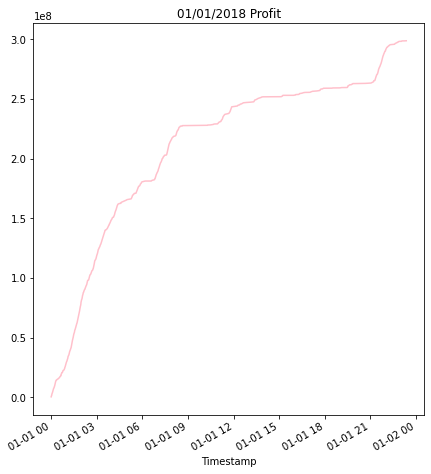

In [124]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(7, 8), title="01/01/2018 Profit", color="pink")

<AxesSubplot:title={'center':'02/15/2018 Profit'}, xlabel='Timestamp'>

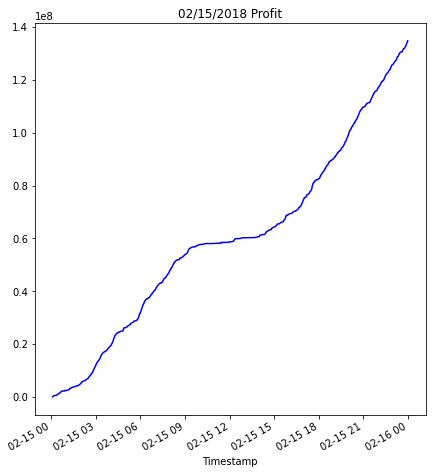

In [125]:
cumulative_profit_middle.plot(figsize=(7, 8), title="02/15/2018 Profit", color="blue")

<AxesSubplot:title={'center':'03/29/2018 Profit'}, xlabel='Timestamp'>

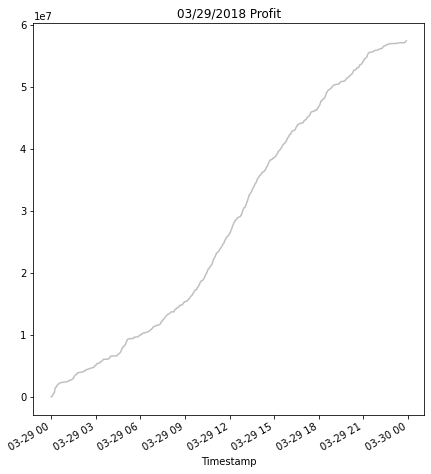

In [126]:
cumulative_profit_late.plot(figsize=(7, 8), title="03/29/2018 Profit", color="silver")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:All three data plots are in an uptrend. The later you move into the data the less steep the uptrend becomes. This translates into more consistent and predictable profits.